# 1. 기본셋팅

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
table_raw = pd.read_csv('./netflix_userbase_dataset.csv',)

## raw data는 남겨두고 복사본으로 정제  

In [3]:
table = table_raw.copy()

# 2. Age 컬럼

In [4]:
average_age = table['Age'].mean()  
min_age = table['Age'].min()  
max_age = table['Age'].max()  
median_age = table['Age'].median()

In [5]:
print("평균 연령:", average_age)
print("최소 연령:", min_age)
print("최대 연령:", max_age)
print("중간 연령:", median_age)

평균 연령: 38.7956
최소 연령: 26
최대 연령: 51
중간 연령: 39.0


## 연령대 계산 함수

In [6]:
def get_age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    else:
        return '50s+'

In [7]:
table['Age Group'] = table['Age'].apply(get_age_group)

In [8]:
age_group_counts = table['Age Group'].value_counts()

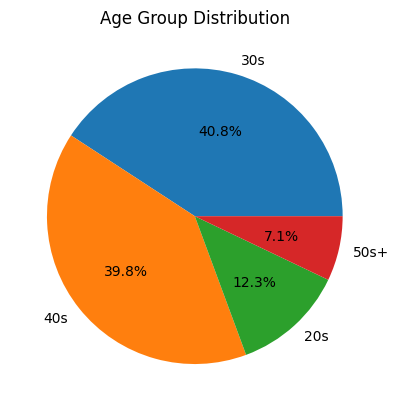

In [9]:
plt.pie(age_group_counts.values, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.show()

# 3. 연령대별 Divice(장치) 선호도 계산

In [16]:
device_preference_by_age = table.groupby('Age Group')['Device'].value_counts().unstack()

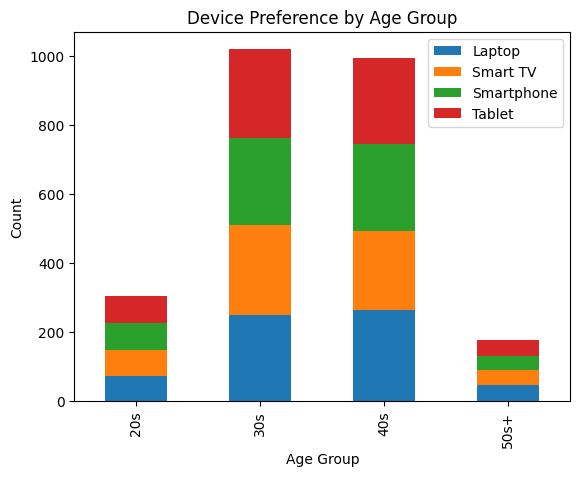

In [17]:
device_preference_by_age.plot(kind='bar', stacked=True)
plt.title('Device Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

# 4. Subscription Type(가입유형)과 Monthly Revenue(월간 수익) 상관 관계

In [13]:
data = table[['Subscription Type', 'Monthly Revenue']]

average_revenue_by_type = data.groupby('Subscription Type')['Monthly Revenue'].mean()

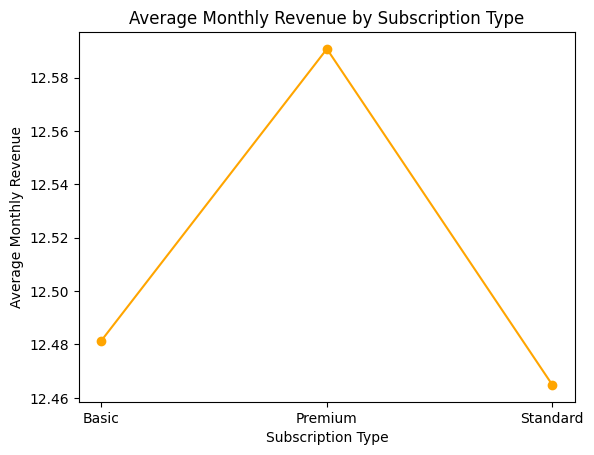

In [15]:
plt.plot(average_revenue_by_type.index, average_revenue_by_type.values, color="orange", marker='o')
plt.title('Average Monthly Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Average Monthly Revenue')
plt.show()